# Cobweb plots of the logistic map

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, glob
import matplotlib.font_manager as fm, IPython.display as IPdisplay
from PIL import Image as PIL_Image
from images2gif import writeGif
%matplotlib inline

In [2]:
# define the fonts to use for plots
family = 'Myriad Pro'
title_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')

In [3]:
# function to save plots to disk
def save_fig(plt, filename='image', dpi=96, bbox_inches='tight', pad=0.1):
    plt.savefig('images/{}.png'.format(filename), dpi=dpi, bbox_inches=bbox_inches, pad_inches=pad)

In [4]:
# for documentation of this function, see chaos-logistic-model.ipynb
def logistic_map(pop, rate):
    return pop * rate * (1 - pop)
def logistic_model(num_gens=50, rate_min=0.5, rate_max=4, num_rates=8, num_discard=0, initial_pop=0.5):
    pops = []
    rates = np.linspace(rate_min, rate_max, num_rates)
    for rate in rates:
        pop = initial_pop
        for _ in range(num_discard):
            pop = logistic_map(pop, rate)
        for _ in range(num_gens):
            pops.append([rate, pop])
            pop = logistic_map(pop, rate)
    df = pd.DataFrame(data=pops, columns=['rate', 'pop'])
    df.index = pd.MultiIndex.from_arrays([num_rates * range(num_gens), df['rate'].values])
    return df.drop(labels='rate', axis=1).unstack()['pop']

### To draw these cobweb plots

1. Let x = 0.5
1. Start on the x-axis at the point (x, 0)
1. Draw a vertical line to the red function curve: this point has the coordinates (x, f(x))
1. Draw a horizontal line from this point to the gray diagonal line: this point has the coordinates (f(x), f(x))
1. Draw a vertical line from this point to the red function curve: this point has the coordinates (f(x), f(f(x)))
1. Repeat steps 4 and 5 recursively one hundred times

### To draw the red function curve and gray diagonal line

Run the logistic map once each for 1000 population values evenly spaced between 0 and 1. This gives us the results of the logistic equation (y values) across the entire range of possible population values (x values). The gray diagonal line is just a plot of y=x.

In [5]:
# calculate the vertices of cobweb lines for a cobweb plot
def get_cobweb_points(r, x=0.5, n=100):
    cobweb_points = [(x, 0)]
    for _ in range(n):
        y1 = logistic_map(x, r)
        cobweb_points.append((x, y1))
        cobweb_points.append((y1, y1))
        y2 = logistic_map(y1, r)
        cobweb_points.append((y1, y2))
        x = y1
    return zip(*cobweb_points)

In [6]:
# calculate logistic map results for n population values evenly spaced between 0 and 1
def get_function_points(r, n=1000):
    x_vals = np.linspace(0, 1, n)
    y_vals = [logistic_map(x, r) for x in x_vals]
    return x_vals, y_vals

In [7]:
# calculate and draw a cobweb plot
def cobweb_plot(r, function_n=1000, cobweb_n=100, cobweb_x=0.5, num_discard=0, filename='', title='', show=True):
    func_x_vals, func_y_vals = get_function_points(r=r, n=function_n)
    cobweb_x_vals, cobweb_y_vals = get_cobweb_points(r=r, x=cobweb_x, n=cobweb_n)
    cobweb_x_vals = cobweb_x_vals[num_discard:]
    cobweb_y_vals = cobweb_y_vals[num_discard:]
    
    fig, ax = plt.subplots(figsize=(6, 6))
    diagonal_line = ax.plot((0,1), (0,1), color='gray', linewidth=1.35)
    function_line = ax.scatter(func_x_vals, func_y_vals, color='r', edgecolor='None', s=1.5)
    cobweb_line = ax.plot(cobweb_x_vals, cobweb_y_vals, color='b', linewidth=1)

    ax.set_ylim((0, 1))
    ax.set_xlim((0, 1))
    if title == '':
        title = 'Logistic Map Cobweb Plot, r={}'.format(r)
    ax.set_title(title, fontproperties=title_font)
    
    if filename == '':
        filename = 'cobweb-plot-r{}-x{}'.format(r, cobweb_x).replace('.', '')
    save_fig(plt, filename)
    if show:
        plt.show()

## Now draw cobweb plots for several values of r

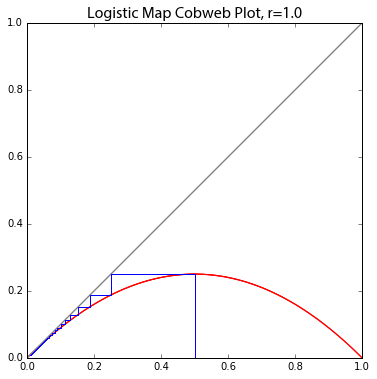

In [8]:
cobweb_plot(r=1.0)

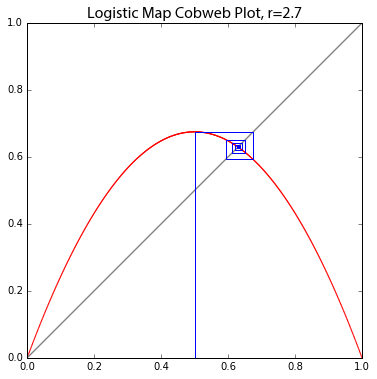

In [9]:
cobweb_plot(r=2.7)

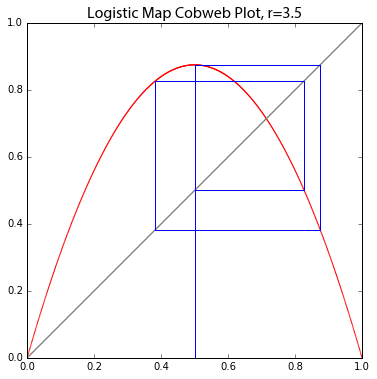

In [10]:
cobweb_plot(r=3.5)

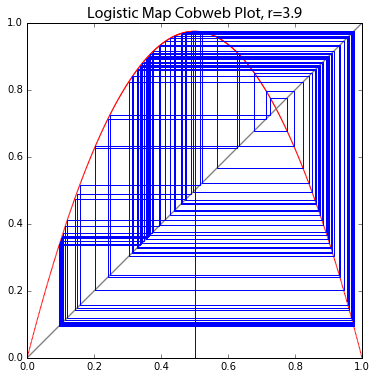

In [11]:
cobweb_plot(r=3.9)

## Demonstrate a basin of attraction with three different initial values and same r

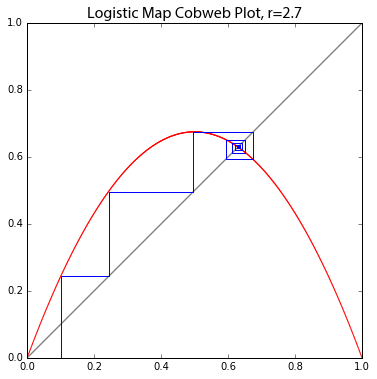

In [12]:
cobweb_plot(r=2.7, cobweb_x=0.1)

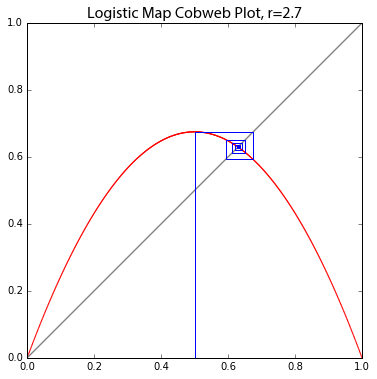

In [13]:
cobweb_plot(r=2.7, cobweb_x=0.5)

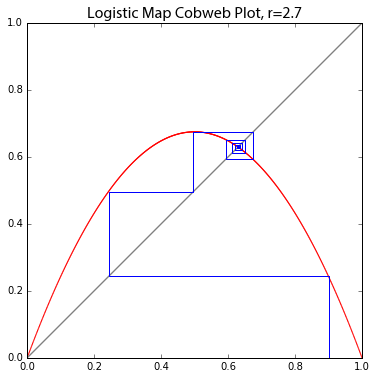

In [14]:
cobweb_plot(r=2.7, cobweb_x=0.9)

## Now animate it

In [15]:
# configure the animation: 70 rates between 0 and 3.999 with 15 paused frames at the start and end
save_folder = 'cobweb-animate'
start_r = 0
end_r = 3.999
steps = 70
start_end_pause = 15
rates = np.linspace(start_r, end_r, steps)
rates = np.append([start_r] * start_end_pause, rates)
rates = np.append(rates, [end_r] * start_end_pause)

In [16]:
# create a plot for each growth rate
for r, n in zip(rates, range(len(rates))):
    filename = '{}/{:03d}'.format(save_folder, n)
    title = 'Logistic Map Cobweb Plot, r={:.2f}'.format(r)
    cobweb_plot(r=r, filename=filename, title=title, show=False)
    plt.close()

In [17]:
# create an animated gif of all the plots then display it inline
images = [PIL_Image.open(image) for image in glob.glob('images/{}/*.png'.format(save_folder))]
gif_filename = 'images/{}/animated-logistic-cobweb.gif'.format(save_folder)
writeGif(gif_filename, images, duration=0.1)
IPdisplay.Image(url=gif_filename)